In [123]:
import pandas as pd
import numpy as np

In [124]:
automobile_data = pd.read_csv('Dataset/Automobile_data.csv', 
                              sep=r'\s*,\s*', 
                              engine='python')

In [125]:
'''
This contains different makes and models of cars and a variety of 
features about each of these cars, such as the fuel system, engine size, 
compression ratio, horsepower, and so on. Any dataset from the real world 
is likely to have some missing fields. 

In this dataset, these are represented by question marks. 
This dataset is useful, price prediction. The very last column here 
is the price of that particular automobile given all its features. 
'''
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [126]:
'''
A common practice when dealing with missing data is simply to drop 
those records which have information missing. 

This is a technique that works for us for the simple model that 
we are building here. We'll first replace all of the question marks by np.nan. 
'''

automobile_data = automobile_data.replace('?', np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [127]:
'''
 The next step is to drop those records which have missing fields and 
 this can now be done easily in Pandas using the drop any function. 
 
 Our dataset now contains only those records which have values for all columns.
'''

automobile_data=automobile_data.dropna()
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [128]:
'''
we are going to make use of just four features, the make, fuel type, body style, 
and horsepower. Let's say we expect these to affect the price of the car the most.

Now in the real world, you'll probably perform some exploratory 
analysis to see what features are most significant. 
'''
col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [129]:
'''
hese are the features, or Xvalues, the target, or Ylabels is the 
automobile price and we extract that into the automobile_target dataframe.
'''

automobile_target = automobile_data[['price']]
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [130]:
'''
All of the fields that we've read into this Pandas data frame are in the 
string format. 

So if you take a look at the horsepower by calling the describe function 
of the horsepower column, you can see that there are 159 unique values. 

Horsepower, however, is a numeric value and has numeric meaning 
so we need to convert it to numeric form. 
'''
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [131]:
'''
we'll turn off a certain warning that Pandas throws up, 
the SettingWithCopyWarning, which warns of unpredictable results when 
we perform chained assignments on our data frame. 
'''
pd.options.mode.chained_assignment=None

In [132]:
'''
We'll then use the pd. to_numeric function in order to convert the 
horsepower field to a numeric form. 

If you now run the describe function on the horsepower column, 
you'll get statistics for numeric data, mean, median, standard deviation, 
and so on.
'''
automobile_features['horsepower'] = \
                pd.to_numeric(automobile_features['horsepower'])
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [133]:
'''
Similarly, the price column in our automobile target data frame is also in 
a string format. 
'''
automobile_target['price'].describe()

count      159
unique     145
top       7898
freq         2
Name: price, dtype: object

In [134]:
'''
We convert that to a numeric form as well by calling astype float. We're simply casting the price strings to be of type float. Run the describe function on our automobile prices and you'll see statistics for numeric values
'''

automobile_target=automobile_target.astype(float)
automobile_target.describe()

,price
count,159.000000
mean,11445.729560
std,5877.856195
min,5118.000000
25%,7372.000000
50%,9233.000000
75%,14719.500000
max,35056.000000


In [135]:
'''
. Our input X features contains values for other columns such as make 
fuel-type and body-style. 
All three of these columns contain values that are categorical in nature. 
They belong to these three categories. 

The inputs that you pass into neural networks and outputs 
from neural networks can only be numeric. 

That means you need to convert these categorical values to some numeric form. 

For this, we'll use one-hot encoding. One-hot encoding is a 
standard technique used to encode categorical data in numeric form.
'''

automobile_features = pd.get_dummies(automobile_features, 
                                     columns= ['make', 'fuel-type', 'body-style'])
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [136]:
automobile_features.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [137]:
'''
Before we feed in these input values to our neural network, we perform some preprocessing. 

When you're working with neural networks on any learning model, 
it's best practice to standardize the numeric values that you 
feed into your ML model. 

This allows the ML model to be more stable during this training 
phase and it just performs better. 

The preprocessing. scale function will standardize the horsepower 
numeric values by subtracting the mean and dividing by the standard deviation.

And here are our standardized values for horsepower. 

Remember, it's not just neural networks, but all ML algorithms 
work better when the numeric values are standardized so that 
they're roughly in the same range. 

We've now set up the input features that we are going to 
feed into a neural network and specify the output targets as well. 
'''
from sklearn import preprocessing
automobile_features[['horsepower']] = \
                preprocessing.scale(automobile_features[['horsepower']])
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [138]:
'''
We'll use the test train split library function from sklearn 
in order to split our dataset into training data and test data. 

We'll use 80% of the dataset for training purposes and 20% to 
test how our model performs.
'''
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(automobile_features,
                                                    automobile_target,
                                                    test_size=0.2,
                                                    random_state=0)

In [139]:
X_train

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
185,-0.353881,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
171,0.658469,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
26,-0.909040,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
137,2.095352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
148,-0.451850,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,-0.843727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
144,-0.451850,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
97,-0.876384,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
158,-1.300918,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [140]:
x_test

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
13,0.821751,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
61,-0.386537,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
136,2.095352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
68,0.887064,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
151,-1.104979,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
161,-0.843727,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
89,-0.876384,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
172,0.658469,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
50,-0.909040,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
117,1.507536,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [141]:
Y_train

,price
185,8195.0
171,11549.0
26,7609.0
137,18620.0
148,8013.0
...,...
19,6295.0
144,9233.0
97,7999.0
158,7898.0


In [142]:
y_test

,price
13,21105.0
61,10595.0
136,18150.0
68,28248.0
151,6338.0
161,8358.0
89,5499.0
172,17669.0
50,5195.0
117,18150.0


In [143]:
#Set the variable dtype to be equal to float. 
import torch
dtype=torch.float

In [144]:
'''
 Our training and test data are currently in the form of Pandas data frames. 
 We'll now convert them to torch tensors by calling the torch. tensor function. 
'''
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [145]:
'''
Our training data set contains 127 records with 26 features.
'''
X_train_tensor.shape

torch.Size([127, 26])

In [146]:
#The actual Y labels that we use for training also contain 127 records
Y_train_tensor.shape

torch.Size([127, 1])

In [147]:
'''
We'll now set up some constants for our neural network. 
The number of input features is equal to 26. 
These are the number of columns present in our training data.

Our output feature is just 1, the price that we predict. 

Our hidden layer will have 100 neurons and the loss function that 
we use this for this regression problem is the mean square error loss, 
the standard loss function for regression.

the learning rate that we use to update our model weights.
'''
inp=26
out=1

hid=100

loss_fn=torch.nn.MSELoss()

learning_rate=0.0001

In [148]:
'''
All neural networks that we construct in PyTorch derive 
from the base torch.nn.Module class. 

When we set up a class containing our own custom neural network that we'll 
do in later examples in this course, you'll find that we derived 
from the torch.nn.Module class. 

Torch.nn.Sequential is a built-in sequential model available in 
PyTorch that allows us to construct neural network layers in a sequence. 

This also derives from the base module class. Every layer that we specify 
in our neural network is a module by itself. 

So a module that is the sequential module can contain other 
modules within it in a nested structure. 

Our first linear layer has input features equal to the number of 
features present in our X data that is 26, and output features equal to 
the number of hidden neurons, which is 100 in our case. 

This is followed by a sigmoid activation function that is an S curve 
followed by another linear layer. 

The number of input features to this layer is equal to 100 and output 
features are equal to 1. That is our Ypredicted output. 

This is fully-connected neural network because the neurons in the first 
layer are all connected to all neurons in the second layer. 
'''

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out),
)

In [149]:
'''
Now that we have set up a neural network, we'll run training for 10, 000 epochs, 
10, 000 passes through our data. 

For every forward pass, we calculate Ypredicted by applying our model to 
an input training data. 

We then calculate a loss for this prediction by passing in 
Ypredicted and Yactual to our loss function. 

Once every 1,000 iterations, print out the value of the loss so that we 
can see how it converges and then zero out your model gradients before you call 
loss.backward.

Loss.backward is what performs the backward pass to our neural network. 

This calculates the gradients which we'll use to update our model weights. 

As we've seen earlier, gradients should be updated within the torch.no_grad 
block so we don't calculate gradients while we're updating our model parameters. 

The model.parameters() function allows you to access all of the 
parameters within your neural network model. 

You can then apply the learning rate multiplied by the gradients 
and update these parameters. 

This is all the code that you need to execute in order to 
run training on your machine learning model and watch the loss reduce 
as you run multiple epochs of training. 


'''

for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)

    if iter % 1000 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


0 168091248.0
1000 4298825.0
2000 2406898.25
3000 1705154.625
4000 1437759.375
5000 1204465.125
6000 1124416.625
7000 1074163.25
8000 1028855.875
9000 990527.5


In [150]:
'''
Let's take a sample instance from our test data and perform prediction 
using our neural network model. 

Here is what our sample looks like. 


'''
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [151]:
'''
We convert the sample to a tensor format using torch.tensor 
and pass the sample through our neural network model. 


'''
sample_tensor = torch.tensor(sample.values, 
                             dtype = dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [152]:
'''
So we call model, pass in the sample_tensor, and get the Ypredicted. 

And let's print out these values to screen to see what the predicted 
value of price is as compared with the original y_test value 
and you can see that this model did pretty well in our sample instance. 

The predicted price of the automobile was around $8,000 and 
the actual price was around $8500. 

A single prediction doesn't give us that much information about how a model works.
'''

y_pred=model(sample_tensor)

print("Predicted price of automobile is : ", int(y_pred.item()))
print("Actual price of automobile is : ", int(y_test.iloc[23]))

Predicted price of automobile is :  8102
Actual price of automobile is :  8495


In [153]:
'''
Let's run predictions on our entire test dataset, the x_test_tensor. 
'''
y_pred_tensor=model(x_test_tensor)

In [154]:
'''
Once we have the predictions, detach the predicted values from our 
computation graph and get it in the form of a NumPy array. 
'''

y_pred=y_pred_tensor.detach().numpy()

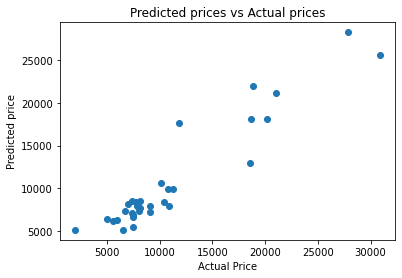

In [155]:
'''
We'll now plot a visualization of actual prices versus predicted prices and 
see how they look. 
We'll first plot this information as a scatter plot to see if they're 
clustered around the same values and you can see that they more or less are.

Here is a data point for which the predicted price is around 
$5000 and the actual price seems to be around $2000, 
not a great prediction, but you can see how the other 
data points are fairly close.
'''

import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [156]:
'''
You can use the torch. save function and specify your model and 
serialize it to the my_model file on disk.
'''
torch.save(model,'sb_model')


In [157]:
'''
Once you have a saved model, you can reload this model using torch.load() 
'''
save_model=torch.load('sb_model')

In [159]:
'''
Let's perform predictions for automobile prices once again, 
but this time we'll use the model that we reloaded from 
disk after having serialized it out. 


'''

y_pred_tensor=save_model(x_test_tensor)
y_pred=y_pred_tensor.detach().numpy()

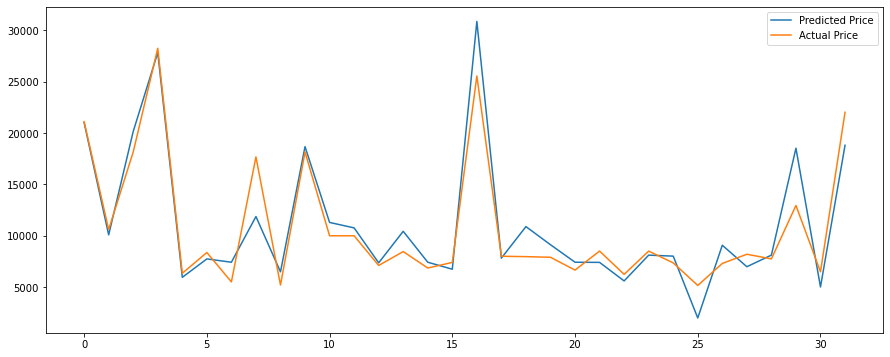

In [160]:
'''
This time, we'll get the predictions on the test data in the 
form of a NumPy array and plot it using a line chart. 
This will allow us to see how closely our predicted values map our 
actual Y values, actual automobile prices. 

The blue line is the predicted price and the orange line is the actual 
price and you can see that it tracked each other closely. 
Our model works pretty well for this dataset.
'''

plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test.values, label='Actual Price')

plt.legend()
plt.show()